In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [91]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
   
   
)


Found 900 files belonging to 3 classes.


In [92]:
train_size=0.8
len(dataset)*train_size

23.200000000000003

In [93]:
test_dataset=train_dataset.skip(23)
train_dataset=train_dataset.take(23)

In [94]:
len(test_dataset)

6

In [74]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Valid",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 300 files belonging to 3 classes.


In [75]:
len(validation_dataset)

10

In [29]:
class_names= train_dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(class_names)

3

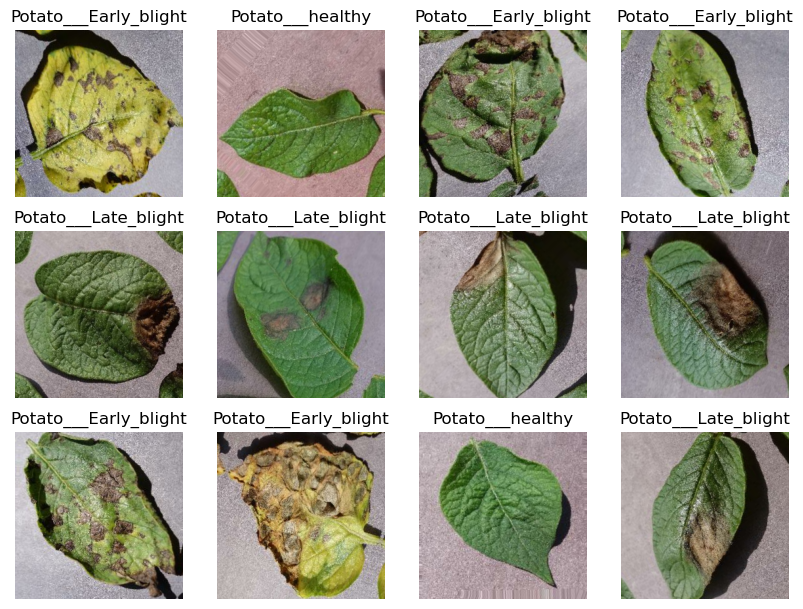

Potato___Early_blight
Potato___healthy
Potato___Early_blight


In [126]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_dataset.take(1):
    
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    plt.show()
    
for i in range(3):
    print(class_names[label_batch[i]])
        
#     print(image_batch.shape)
#     print(label_batch.numpy())

In [60]:
len(test_dataset)

0

In [63]:
# Iterate through the test dataset and display images
for images, labels in test_dataset:
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(4, 4, i + 1)  # Adjust the layout as needed
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
    plt.show()

In [96]:
train_dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [98]:
### Preprocessing ###

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [108]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [99]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [100]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [103]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [109]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
23/23 [==============================] - 55s 2s/step - loss: 1.1043 - accuracy: 0.3533 - val_loss: 1.0918 - val_accuracy: 0.5167
Epoch 2/50
23/23 [==============================] - 49s 2s/step - loss: 1.0363 - accuracy: 0.4524 - val_loss: 0.8437 - val_accuracy: 0.5900
Epoch 3/50
23/23 [==============================] - 48s 2s/step - loss: 0.7953 - accuracy: 0.6155 - val_loss: 0.5796 - val_accuracy: 0.7400
Epoch 4/50
23/23 [==============================] - 49s 2s/step - loss: 0.5576 - accuracy: 0.7486 - val_loss: 0.4624 - val_accuracy: 0.8033
Epoch 5/50
23/23 [==============================] - 48s 2s/step - loss: 0.5125 - accuracy: 0.7785 - val_loss: 0.8501 - val_accuracy: 0.6700
Epoch 6/50
23/23 [==============================] - 48s 2s/step - loss: 0.5011 - accuracy: 0.7853 - val_loss: 0.3566 - val_accuracy: 0.8367
Epoch 7/50
23/23 [==============================] - 49s 2s/step - loss: 0.3761 - accuracy: 0.8451 - val_loss: 0.2965 - val_accuracy: 0.8867
Epoch 8/50
23/23 [==

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

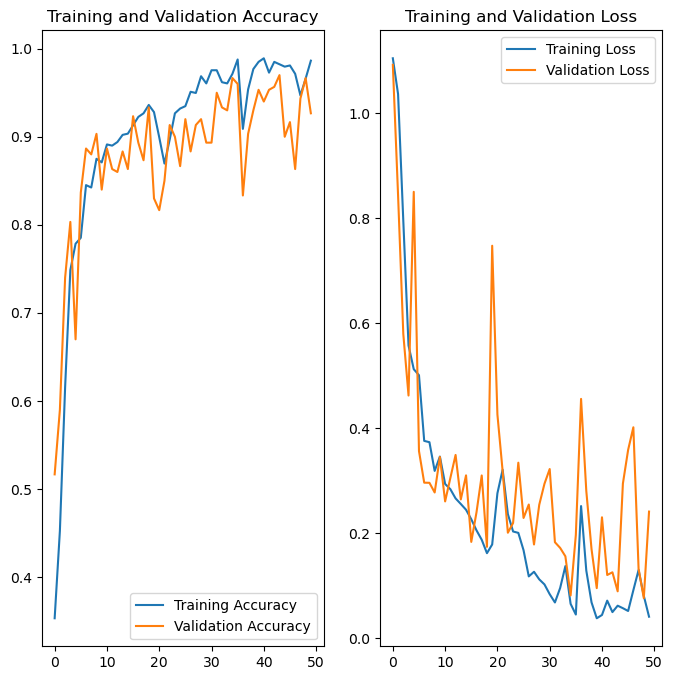

In [111]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [112]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 65ms/step


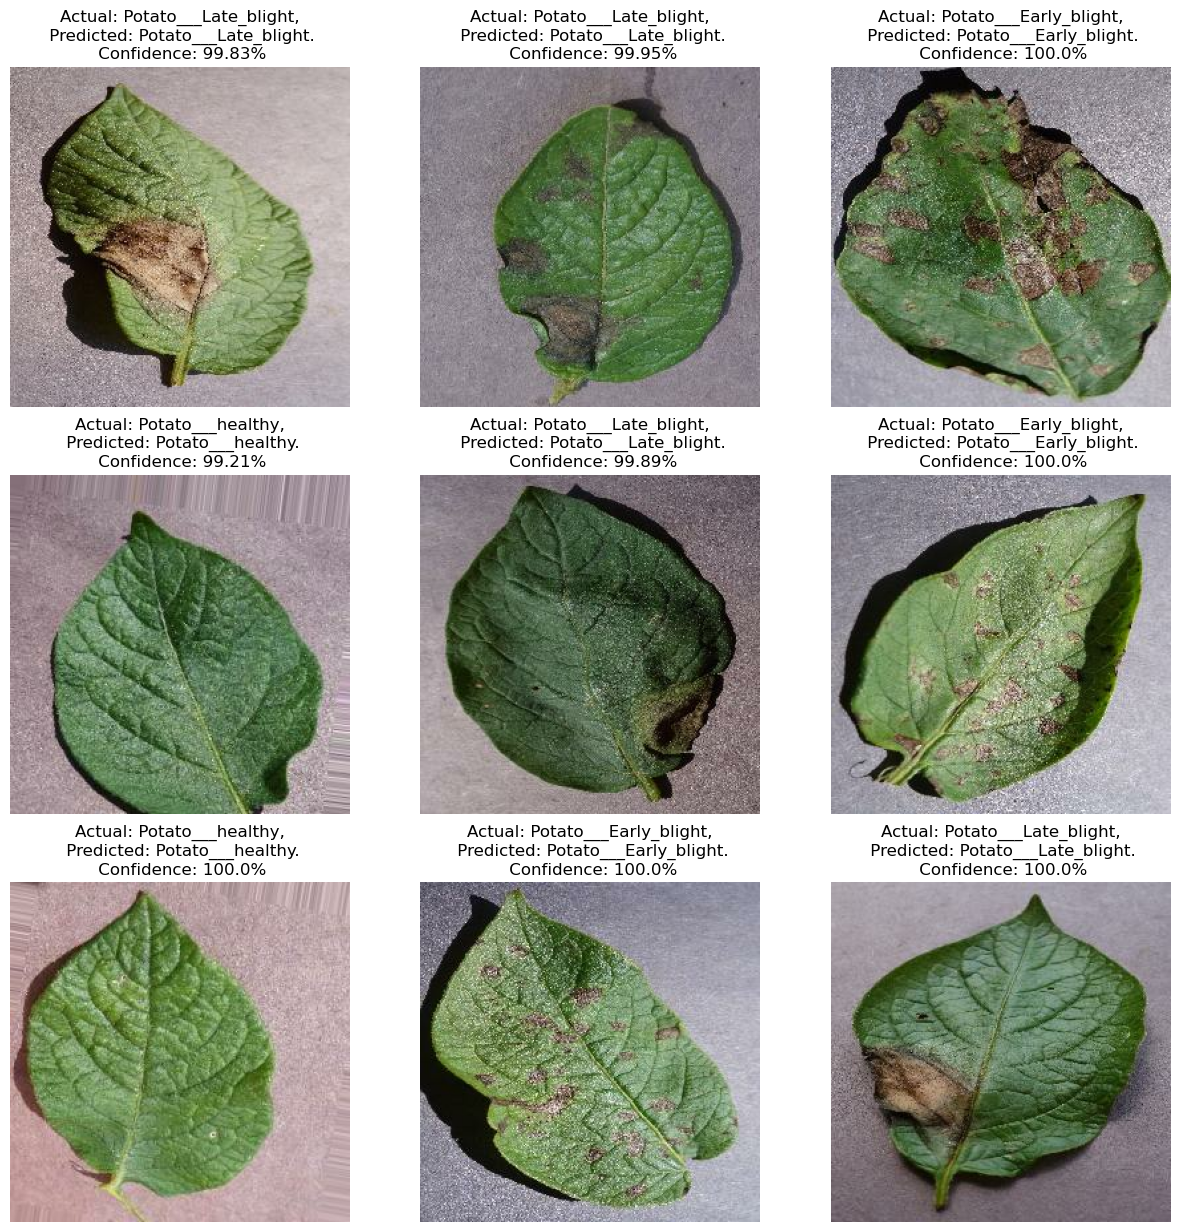

In [116]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [123]:
save_dir = r"C:\Users\shaswot paudel\krishiVue\Trained Model"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# List existing model versions in the target directory
existing_versions = [int(i) for i in os.listdir(save_dir) if os.path.isdir(os.path.join(save_dir, i)) if i.isdigit()]

# Calculate the next version number
if existing_versions:
    model_version = max(existing_versions) + 1
else:
    model_version = 1

# Save the model
model.save(os.path.join(save_dir, str(model_version)))

INFO:tensorflow:Assets written to: C:\Users\shaswot paudel\krishiVue\Trained Model\2\assets


INFO:tensorflow:Assets written to: C:\Users\shaswot paudel\krishiVue\Trained Model\2\assets


In [122]:
model.save("../potatoes.h5")

C:\Users\shaswot paudel\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
